# MRI Preprocessing Pipeline 🧠

This notebook demonstrates a simple MRI preprocessing pipeline as a **first step toward AI-powered cancer detection**  

**What you'll see here:**
- Loading MRI images
- Grayscale conversion
- Intensity normalization
- Noise reduction
- Contrast enhancement
- Edge detection
- Side-by-side visualization

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io, exposure, data

## Load MRI Image
You can use the sample image provided (`data/my_mri1.png`or`data/my_mri2.png` ) or your own MRI images
by default the notebook will load (`data/my_mri1.png`)
to switch to the other image, just change the filename in the code cell below

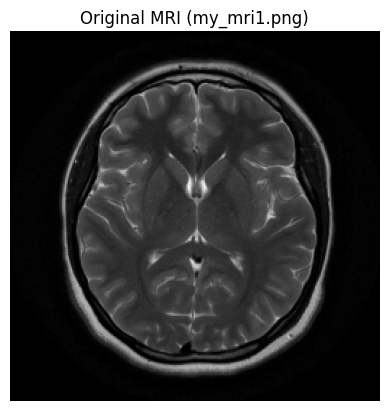

In [ ]:
import os

image_files = ['data/my_mri1.png', 'data/my_mri2.png']

idx = 0 # Change to 1 to load the second image
image_path = image_files[idx]

if not os.path.exists(image_path):
    raise FileNotFoundError(f"{image_path} not found. Make sure it exists in the data/ folder.")
mri = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
mri = cv2.resize(mri, (256, 256))

plt.imshow(mri, cmap='gray')
plt.title(f'Original MRI ({os.path.basename(image_path)})')
plt.axis('off')
plt.show()

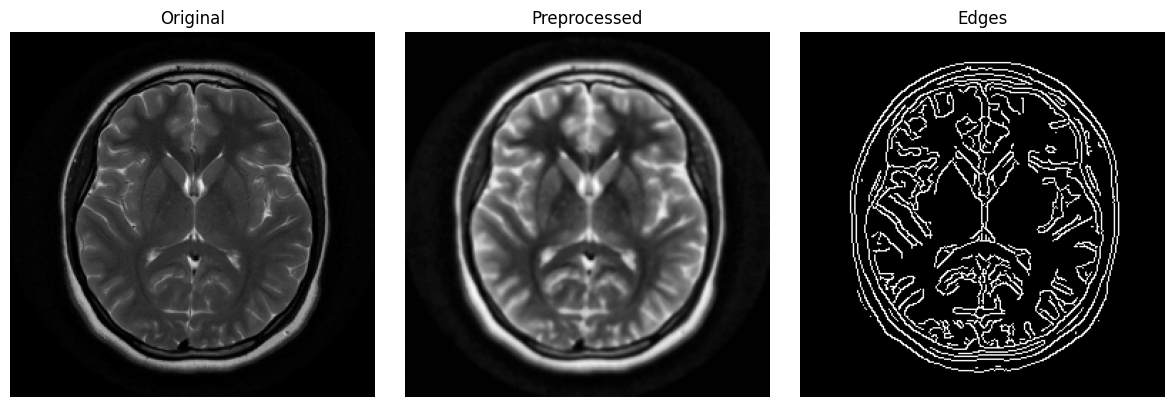

In [ ]:
mri_norm = cv2.normalize(mri, None, 0, 255, cv2.NORM_MINMAX)
mri_blur = cv2.GaussianBlur(mri_norm, (5, 5), 0)
mri_eq = cv2.equalizeHist(mri_blur)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
mri_eq = clahe.apply(mri_blur)
mri_edges = cv2.Canny(mri_eq, 50, 150)
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(mri, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mri_eq, cmap='gray')
plt.title('Preprocessed')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mri_edges, cmap='gray')
plt.title('Edges')
plt.axis('off')

plt.tight_layout()

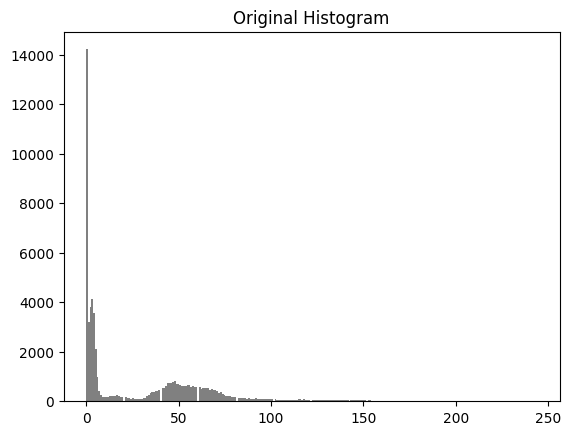

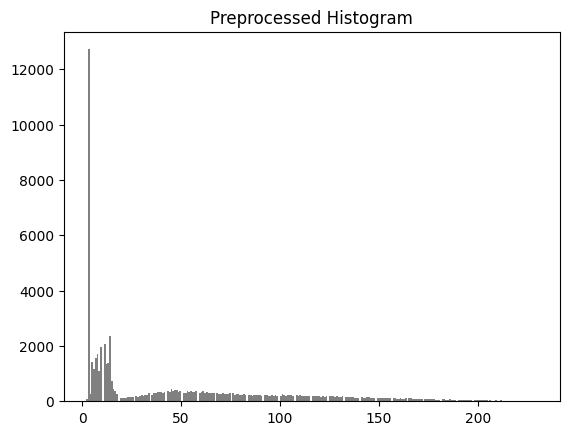

In [11]:
plt.hist(mri.ravel(), bins=256, color='gray'); plt.title('Original Histogram'); plt.show()
plt.hist(mri_eq.ravel(), bins=256, color='gray'); plt.title('Preprocessed Histogram'); plt.show()

**What you can do next:**
- Feed preprocessed MRI images into deep learning models for tumor or cancer detection
- Experiment with different filtering, normalization, and edge detection techniques
- Add more MRI samples for batch preprocessing and analysis

This notebook is **fully reproducible**; simply add your own MRI images to the `data/` folder and update the file name in the code cells